Building a deep neural network from scratch using Input, Dense, Activation, Dropout layers

In [1]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [43]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [3]:
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
x_train[1]

array([[[0.00236832, 0.00272203, 0.00287582],
        [0.00193772, 0.00210688, 0.0020915 ],
        [0.00161476, 0.00159938, 0.00146098],
        ...,
        [0.00139946, 0.00146098, 0.00109189],
        [0.00133795, 0.00138408, 0.00109189],
        [0.00121492, 0.00124567, 0.00107651]],

       [[0.00215302, 0.00246059, 0.002599  ],
        [0.00222991, 0.00235294, 0.00236832],
        [0.00192234, 0.00192234, 0.00181469],
        ...,
        [0.00147636, 0.00152249, 0.00119954],
        [0.00118416, 0.0012303 , 0.00095348],
        [0.00109189, 0.00112265, 0.0009381 ]],

       [[0.00215302, 0.0023837 , 0.00252211],
        [0.00213764, 0.00224529, 0.00229143],
        [0.00176855, 0.00176855, 0.00172241],
        ...,
        [0.00121492, 0.00126105, 0.00098424],
        [0.00104575, 0.00107651, 0.00084583],
        [0.00103037, 0.00106113, 0.00084583]],

       ...,

       [[0.00269127, 0.00256824, 0.00255286],
        [0.00239908, 0.00236832, 0.00246059],
        [0.00236832, 0

In [5]:
inputs = Input(shape=(32,32,3))

In [6]:
x = Flatten()(inputs)

In [7]:
x = Dense(200, activation='relu')(x)
#x = Dense(x)
x = Dense(150, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

In [8]:
model = Model(inputs=inputs, outputs=outputs, name='dnn')

In [9]:
model.summary()

Model: "dnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,064 (2.50 MB)

 Trainable params: 655,064 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from keras.utils import plot_model
from keras.optimizers import Adam

In [26]:
#plot_model(model)

In [11]:
opt = Adam(learning_rate=0.005)

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [13]:
model.fit(x_train, y_train, batch_size=32, shuffle=True,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.2373 - loss: 2.1575
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3398 - loss: 1.8170
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3562 - loss: 1.7684
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3640 - loss: 1.7541
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3755 - loss: 1.7321
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3805 - loss: 1.7150
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3821 - loss: 1.7112
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3773 - loss: 1.7052
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3856 - loss: 1.6996
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3883 - loss: 1.6908


In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3866 - loss: 1.6874


[1.696843147277832, 0.38609999418258667]

In [15]:
opt2 = Adam(learning_rate=0.0001)

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt2)

In [17]:
model.fit(x_train, y_train, batch_size=32, shuffle=True,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4196 - loss: 1.6115
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4266 - loss: 1.5903
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4341 - loss: 1.5673
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4298 - loss: 1.5762
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4289 - loss: 1.5807
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4354 - loss: 1.5675
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4339 - loss: 1.5715
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.4340 - loss: 1.5637
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.4356 - loss: 1.5567
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4339 - loss: 1.5674


In [18]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4256 - loss: 1.5849


[1.6004043817520142, 0.42149999737739563]

Adding Convolutional layers

In [26]:
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Dropout

In [29]:
input_layer = Input(shape=(32,32,3))

x = Conv2D(filters= 32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(64)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [30]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,170 (2.29 MB)

 Trainable params: 599,530 (2.29 MB)

 Non-trainable params: 640 (2.50 KB)

In [31]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, batch_size=32, shuffle=True, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 94ms/step - accuracy: 0.3147 - loss: 2.0897
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 93ms/step - accuracy: 0.4961 - loss: 1.4039
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 94ms/step - accuracy: 0.5624 - loss: 1.2283
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.6102 - loss: 1.1046
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 94ms/step - accuracy: 0.6400 - loss: 1.0213
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 95ms/step - accuracy: 0.6632 - loss: 0.9582
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6850 - loss: 0.8964
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 94ms/step - accuracy: 0.6995 - loss: 0.8542
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 94ms/step - accuracy: 0.7103 - loss: 0.8205
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 95ms/step - accuracy: 0.7248 - loss: 0.7787
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 94ms/step - accuracy: 0.7337 - loss: 0.7

In [33]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6995 - loss: 0.9648


[0.967063307762146, 0.6953999996185303]

In [34]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


In [37]:
import numpy as np

In [40]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

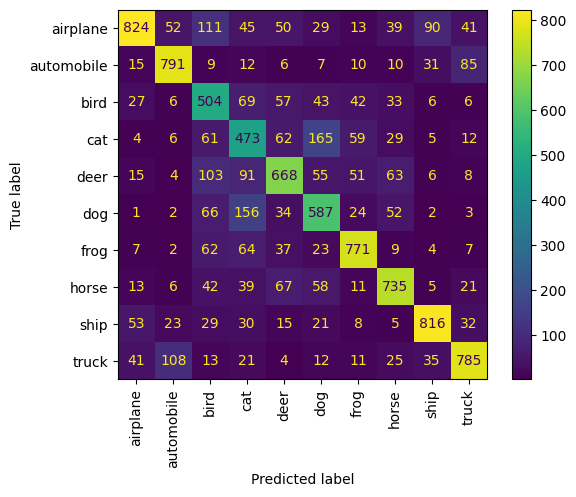

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred_labels, y_test_labels)
disp = ConfusionMatrixDisplay(cm,display_labels=classes)
disp.plot(xticks_rotation="vertical")